# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)

# Data loading

In [2]:
df = pd.read_csv('database.csv', sep=',', index_col=0, header=0)

In [3]:
df.head()

,Primaries,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Secondaries,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Tertiaries,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Tailfeathers,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
Species,M,D,Colour of calamus,Colour of rachis (upper),Colour of rachis (under),T,S,Colour of outer vane,Colour of inner vane,Colour of upper vanes,MAX,MIN,M,D,Colour of calamus,Colour of rachis (upper),Colour of rachis (under),T,S,Colour of outer vane,Colour of inner vane,Colour of upper vanes,MAX,MIN,M,D,Colour of calamus,Colour of rachis (upper),Colour of rachis (under),T,S,Colour of outer vane,Colour of inner vane,Colour of upper vanes,MAX,MIN,M,D,Colour of calamus,Colour of rachis (upper),Colour of rachis (under),T,S,Colour of outer vane,Colour of inner vane,Colour of upper vanes,MAX,MIN
Anser anser,5,3,biały,biały,biały,5,2,czarnobrązowy z szarym nalotem,czarnobrązowy z szarą nasadą,brązowoszary,330,220,4,3,biały,biały,biały,4,2,czarnobrązowy z szarą nasadą,czarnobrązowy z szarą nasadą,brązowoszary,220,200,4,1,biały,biały,biały,4,2,czarnobrązowy z szarą nasadą i białożółtą kraw...,czarnobrązowy z szarą nasadą,brązowoszary,220,150,4,2,biały,biały,biały,4,2,szarobrązowy z białym wierzchołkiem,biały z szarą nasadą,jasnoszary,170,140
Tadorna tadorna (adult),5,3,biały,czarny,białoczarny,5,2,czarny,czarny,szaroczarny,270,160,4,3,biały,białoczarny,białoczarny,4,2,czarne z białą nasadą i zieolonym połyskiem,czarnobiałe,szarobiały,170,150,4,1,biały,biały,biały,4,2,biały / czarny / ceglasty,biały,biały / szary,180,100,4,2,biały,biały,biały,4,2,biały z czarnym wąskim wierzchołkiem,biały z czarnym wąskim wierzchołkiem,biały,140,120
Tadorna tadorna (young),5,3,biały,czarnobrązowy,białoczarnobrązowy,5,2,czarnoszare z białawą nasadą / + z białym wier...,czarnoszare z białawą nasadą / + z białym wier...,szaroczarne z białawą nasadą / + z białym wier...,270,160,4,3,biały,biały i czarnobrązowy,biały i czarnobrązowy,4,2,czarnoszare z białym wierzchołkiem,czanoszare z białą nasadą i białym wierzchołkiem,biały / szary,170,150,4,1,biały,szarobrązow / biały,szarobrązow / biały,4,2,biały / brązowoszary z płową krawędzią,biały / szarobrązowy,biały / jasnoszary,180,100,4,2,biały,biały,biały,4,2,biały z ciemnobrązowym wierzchołkiem,biały z ciemnobrązowym wierzchołkiem,biały,140,120
Anas platyrhynchos,5,3,biały,szarobrązowy,szarobrązowy,5,2,szarobrązowe,szarobrązowe z szarą nasadą,szarobrązowy,220,130,4,3,biały,szarobrązowy,szarobrązowy,4,2,czarne z niebieskim połyskiem i białym wierzch...,szarobrązowe,szarobrązowe,140,120,4,1,biały,brązowy,szary,3,3,szare / jasnoszare,szare / jasnoszare,jasnoszary,170,70,4,3,biały,jasnoszary / szary,jasnoszary,3,2,szarobiały / szarobiały z mozaiką,szarobiały / szarobiały z mozaiką,biały / jasnoszary,120,90


### Build 2-level column index

In [4]:
c1 = [x for x in df.columns if 'Unnamed' not in x]
c1

['Primaries', 'Secondaries', 'Tertiaries', 'Tailfeathers']

In [5]:
len(df.columns) / len(c1)

12.0

In [6]:
c2 = df.iloc[0,:12].values
c2

array(['M', 'D', 'Colour of calamus', 'Colour of rachis (upper)',
       'Colour of rachis (under)', 'T', 'S', 'Colour of outer vane',
       'Colour of inner vane', 'Colour of upper vanes', 'MAX', 'MIN'],
      dtype=object)

In [7]:
mi = np.stack(np.meshgrid(c1, c2)).T.reshape(-1,2)
mi.shape

(48, 2)

In [8]:
mi = pd.MultiIndex.from_arrays(mi.T)

In [9]:
df = pd.DataFrame(df.iloc[1:].values, index=df.iloc[1:].index, columns=mi)

In [10]:
df.head()

Primaries                       \
                                M  D Colour of calamus   
Anser anser                     5  3             biały   
Tadorna tadorna (adult)         5  3             biały   
Tadorna tadorna (young)         5  3             biały   
Anas platyrhynchos              5  3             biały   
Anas crecca                     4  3             biały   

                                                                              \
                        Colour of rachis (upper) Colour of rachis (under)  T   
Anser anser                                biały                    biały  5   
Tadorna tadorna (adult)                   czarny              białoczarny  5   
Tadorna tadorna (young)            czarnobrązowy       białoczarnobrązowy  5   
Anas platyrhynchos                  szarobrązowy             szarobrązowy  5   
Anas crecca                                szary                    szary  4   

                                                                               \
                         S                               Colour of outer vane   
Anser anser              2                     czarnobrązowy z szarym nalotem   
Tadorna tadorna (adult)  2                                             czarny   
Tadorna tadorna (young)  2  czarnoszare z białawą nasadą / + z białym wier...   
Anas platyrhynchos       2                                       szarobrązowe   
Anas crecca              2                                        ciemnoszary   

                                                                            \
                                                      Colour of inner vane   
Anser anser                                   czarnobrązowy z szarą nasadą   
Tadorna tadorna (adult)                                             czarny   
Tadorna tadorna (young)  czarnoszare z białawą nasadą / + z białym wier...   
Anas platyrhynchos                             szarobrązowe z szarą nasadą   
Anas crecca                             szary z ciemnoszarym wierzchołkiem   

                                                                            \
                                                     Colour of upper vanes   
Anser anser                                                   brązowoszary   
Tadorna tadorna (adult)                                        szaroczarny   
Tadorna tadorna (young)  szaroczarne z białawą nasadą / + z białym wier...   
Anas platyrhynchos                                            szarobrązowy   
Anas crecca                                                          szary   

                                  Secondaries                       \
                         MAX  MIN           M  D Colour of calamus   
Anser anser              330  220           4  3             biały   
Tadorna tadorna (adult)  270  160           4  3             biały   
Tadorna tadorna (young)  270  160           4  3             biały   
Anas platyrhynchos       220  130           4  3             biały   
Anas crecca              160   90           4  3             biały   

                                                                              \
                        Colour of rachis (upper) Colour of rachis (under)  T   
Anser anser                                biały                    biały  4   
Tadorna tadorna (adult)              białoczarny              białoczarny  4   
Tadorna tadorna (young)    biały i czarnobrązowy    biały i czarnobrązowy  4   
Anas platyrhynchos                  szarobrązowy             szarobrązowy  4   
Anas crecca                                szary                    szary  3   

                                                                               \
                         S                               Colour of outer vane   
Anser anser              2                       czarnobrązowy z szarą nasadą   
Tadorna tadorna (adult)  2        czarne z białą nasadą i zieolonym połyskiem   
Tadorna tadorna (y

# Find NaN

In [11]:
df.isna().sum(axis=1).values

array([ 0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0])

In [12]:
nan = df.isna().sum(axis=1).values > 0

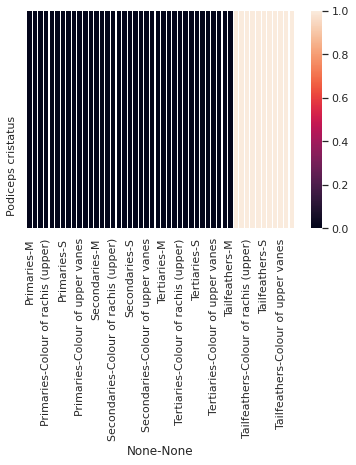

In [13]:
#plt.figure(figsize=(16,10))
sns.heatmap(df[nan].isna(), linewidths=0.1)

# Get sets of unique values

In [14]:
values = {x:df.loc[:,x].unique() for x in df.columns}

In [15]:
flat = {x:set() for x in set([k[1] for k in values])}
for k in values:
    flat[k[1]] = flat[k[1]].union(values[k])

In [16]:
values = pd.DataFrame({k:[flat[k]] for k in flat}).sort_index(axis=1)
values

,Colour of calamus,Colour of inner vane,Colour of outer vane,Colour of rachis (under),Colour of rachis (upper),Colour of upper vanes,D,M,MAX,MIN,S,T
0,"{nan, brązowy, żółtoszary, biały, biała, szara...","{nan, mozaikowato szare z pomarańczowym tłem i...","{czarnoszare, nan, żółtopomarańczowe przechodz...","{nan, białoczarny, biały, czarnobrązowy, szara...","{nan, czarnobrązowa, biała do brązowej, biały,...","{nan, jasnożółte z 5 szerokimi brązowymi pręga...","{1, 2, 3, nan}","{2, Ten typ piór nie występuje u tego gatunku!...","{nan, 350, 310, 330, 120, 140, 180, 270, 490, ...","{nan, 150, 160, 60, 210, 35, 250, 40, 120, 140...","{1, 2, 3, nan}","{nan, 2, 4, 3, 1, 5}"


# Translate

In [17]:
keys = set()
for s in values.values.ravel():
    keys = keys.union(s)
keys.remove(np.nan)

In [18]:
# Set to True to show all necessary translations
if False:
    for k in sorted(keys):
        print(f'\'{k}\':,')

In [19]:
translation = {
    'biała':'white',
    'biała do brązowej':'white brown',
    'biała i czarna':'white black',
    'biała i czarnobrązowa':'white black brown',
    'białe':'white',
    'białe w dolnej połowie, czarne w górnej połowie':'white black',
    'białe z zarysem czarnobrązowego wierzchołka i prążków':'white black brown stripes',
    'białe z zarysem prążków':'white stripes',
    'białe, a przy stosinie ciemnobrązowe':'white darkbrown',
    'białe, a przy stosinie ciemnobrązowe / białe, a przy stosinie ciemnobrązowe z jednym - czterema prostymi, ciemniejszymi pręgami':'white darkbrown stripes',
    'białe, a przy stosinie ciemnobrązowe z dwoma - trzema prostymi, ciemniejszymi pręgami':'white darkbrown stripes',
    'białe, a przy stosinie ciemnobrązowe z trzema - czterema prostymi, ciemniejszymi pręgami':'white darkbrown stripes',
    'białe, brązowe przy stosinie i z brązowymi prążkami':'white brown stripes',
    'białe, brązowe przy stosinie i z brązowymi wierzchołkami i brązowymi prążkami':'white brown stripes',
    'białe, brązowe przy stosinie i z brązowymi wierzchołkami i brązowymi prążkami / bez prążków':'white brown stripes',
    'białe, brązowe przy stosinie i z czarnobrązowymi wierzchołkami i brązowymi prążkami':'white brown black stripes',
    'białe, brązowe przy stosinie i z czarnobrązowymi wierzchołkami i brązowymi prążkami / bez prążków':'white brown black stripes',
    'białei z brązowymi wierzchołkami i zarysem prążków':'white brown weak-stripes',
    'białei z czarnobrązowymi wierzchołkami i zarysem prążków':'white black brown weak-stripes',
    'białoczarnobrązowy':'white black brown',
    'białoczarny':'white black',
    'białoróżowe':'white pink',
    'białoszary':'white grey',
    'biały':'white',
    'biały / biały z szaroczarnym':'white grey black',
    'biały / brązowoszary z płową krawędzią':'white brown grey',
    'biały / czarny / ceglasty':'white black orange',
    'biały / jasnoszary':'white lightgrey',
    'biały / szarobrązowy':'white grey brown',
    'biały / szary':'white grey',
    'biały do jasnoszarego':'white lightgrey',
    'biały i czarnobrązowy':'white black brown',
    'biały i czarny':'white black',
    'biały i szaroczarny':'white grey black',
    'biały i szary':'white grey',
    'biały z ciemnobrązowym wierzchołkiem':'white darkbrown',
    'biały z czarnym wąskim wierzchołkiem':'white black',
    'biały z szarą nasadą':'white grey',
    'biały, szary i czarny':'white grey black',
    'brązowe do białych, z brązowymi prążkami':'brown white stripes',
    'brązowe do białych, z czarnobrązowym, szerokim wierzchołkiem i czasami z brązowymi prążkami':'brown white black brown stripes',
    'brązowe z czanobrązowymi wierzchołkami, czasem z ciemniejszymi prążkami':'brown black brown stripes',
    'brązowe, czasem z ciemniejszymi prążkami':'brown stripes',
    'brązowoszary':'brown grey',
    'brązowy':'brown',
    'ciemnobrązowe':'darkbrown',
    'ciemnoszare':'darkgrey',
    'ciemnoszare / ciemnoszare z białą krawędzią':'darkgrey white',
    'ciemnoszare z białą krawędzią':'darkgrey white',
    'ciemnoszary':'darkgrey',
    'ciemnoszary z białą krawędzią':'darkgrey white',
    'czanoszare z białą nasadą i białym wierzchołkiem':'black grey white',
    'czanoszary':'black grey',
    'czarna':'black',
    'czarne':'black',
    'czarne / czarne z białą nasadą':'black white',
    'czarne z białym wierzchołkiem / + z zielonym połyskiem':'black white glossy',
    'czarne z białą nasadą i zieolonym połyskiem':'black white glossy',
    'czarne z niebieskim połyskiem i białym wierzchołkiem':'black white glossy',
    'czarnobiałe':'white black',
    'czarnobiały':'black white',
    'czarnobrązowa':'black brown',
    'czarnobrązowe':'black brown',
    'czarnobrązowe / czarnobrązowe z kilkoma brązowymi pręgami na środku i czarnym wierzchołkiem':'black brown stripes',
    'czarnobrązowe z kilkoma brązowymi pręgami na środku i czarnym wierzchołkiem':'black brown stripes',
    'czarnobrązowy':'black brown',
    'czarnobrązowy z szarym nalotem':'black brown grey',
    'czarnobrązowy z szarą nasadą':'black brown grey',
    'czarnobrązowy z szarą nasadą i białożółtą krawędzią':'black brown grey white yellow',
    'czarnobrązowy z zielonym i fioletowym połyskiem':'black brown glossy',
    'czarnobrązowy z zielonym połyskiem':'black brown glossy',
    'czarnoszara':'black grey',
    'czarnoszare':'black grey',
    'czarnoszare z białawą nasadą / + z białym wierzchołkiem':'black grey white',
    'czarnoszare z białym wierzchołkiem':'black grey white',
    'czarnoszary':'black grey',
    'czarnoszary z popielatym nalotem':'black grey',
    'czarny':'black',
    'czarny / czarnobrązowy':'black brown',
    'czarny / czarnobrązowy z małą białą nasadą':'black brown white',
    'czarny / czarnobrązowy, z jasnoszarą nasadą':'black brown lightgrey',
    'czarny / czarny z białym nalotem':'black white',
    'czarny / czarny z niebieskim połyskiem':'black glossy',
    'czarny z małą białą nasadą':'black white',
    'czarny z niebieskim połyskiem':'black glossy',
    'jasnoszara z ciemnoszarym wierzchołkiem':'lightgrey darkgrey',
    'jasnoszare i ciemnoszare przy wierzchołku':'lightgrey darkgrey',
    'jasnoszare z ciemnioszarym wierzchołkiem':'lightgrey darkgrey',
    'jasnoszary':'lightgrey',
    'jasnoszary / szary':'lightgrey grey',
    'jasnoszary u nasady, szary, ciemnoszary, czarny wierzchołek, pióro postrzępione':'lightgrey grey darkgrey black',
    'jasnoszary z jasną nasadą':'lightgrey',
    'jasnoszary z jasną nasadą i białym wierzchołkiem':'lightgrey white',
    'szara':'grey',
    'szara / ciemnoszara':'grey darkgrey',
    'szara z ciemnoszarym wierzchołkiem':'grey darkgrey',
    'szare':'grey',
    'szare / jasnoszare':'grey lightgrey',
    'szarobiały':'grey white',
    'szarobiały / szarobiały z mozaiką':'lightgrey grey white',
    'szarobrązow / biały':'grey brown white',
    'szarobrązowe':'grey brown',
    'szarobrązowe z szarą nasadą':'grey brown',
    'szarobrązowy':'grey brown',
    'szarobrązowy z białym wierzchołkiem':'grey brown white',
    'szaroczarne':'grey black',
    'szaroczarne z białawą nasadą / + z białym wierzchołkiem':'grey black white',
    'szaroczarne z białymi nasadami':'grey black white',
    'szaroczarny':'grey black',
    'szarożółty':'grey yellow',
    'szary':'grey',
    'szary / ciemnoszary':'grey darkgrey',
    'szary i czarnoszary':'grey black',
    'szary z białą nasadą':'grey white',
    'szary z ciemnoszarym wierzchołkiem':'grey darkgrey',
    'szary z mozaiką na krawędzi / szary z czarnobiałą krawędzią':'grey black white',
    'szary, od górnej połowy czarny / czarnobrązowy':'grey black brown',
    'żółtobrązowy':'yellow brown',
    'żółtoszary':'yellow grey',
    'białe z 5 szerokimi czarnobrązowymi pręgami':'white black brown wide-stripes',
    'białe z brązowym prążkowaniem':'white brown stripes',
    'białe z niewyraźnym brązowym prążkowaniem':'white brown weak-stripes',
    'białe z szarym wierzchołkiek i brązowymi prążkami':'white grey brown stripes',
    'białe ze słabym prążkowaniem':'white weak-stripes',
    'białobrązowy':'white brown',
    'brązowa / ze śladem prążkowania':'brown weak-stripes',
    'brązowe / jasnożółte, z 5 szerokimi brązowymi pręgami':'brown lightyellow brown wide-stripes',
    'ciemnobrązowa':'darkbrown',
    'ciemnobrązowa / ze śladem prążkowania':'darkbrown weak-stripes',
    'ciemnobrązowa przy wierzchołku, jasnożółta przy nasadzie, z szerokimi wyraźnymi ciemnobrązowymi pręgami':'darkbrown lightyellow wide-stripes',
    'ciemnobrązowa z jasnożółtym rozjaśnieniem nasady, z 2/3 szerokimi ciemnobrązowymi pręgami':'darkbrown lightyellow wide-stripes',
    'ciemnobrązowy':'darkbrown',
    'ciemnoszare do czarnych z białym pasem na środku w poprzek pióra':'darkgrey black white',
    'ciemnoszare z szerokim czarnym końcem i szarym pasem na środku w poprzek pióra':'darkgrey grey',
    'czarna / jasnopopielata z czarnymi pręgami':'black lightgris black stripes',
    'czarna / popielata':'black gris',
    'czarna / popielata z białą nasadą i z trzema czarnymi, szerokimi pręgami':'black gris white wide-stripes',
    'czarnoszara / szara':'black grey',
    'jasnobrązowe z białym w tle i z niewyraźnymi ciemnobrązowymi prążkami':'lightbrown white darkbrown weak-stripes',
    'jasnobrązowe z białą nasadą i z wyraźnymi ciemnobrązowymi prążkami':'lightbrown white darkbrown stripes',
    'jasnobrązowe z niewyraźnymi ciemnobrązowymi prążkami':'lightbrown darkbrown weak-stripes',
    'jasnobrązowe z wyraźnymi ciemnobrązowymi prążkami':'lightbrown darkbrown stripes',
    'jasnobrązowe z wyraźnymi, ciemnobrązowymi pręgami':'lightbrown darkbrown stripes',
    'jasnobrązowy':'lightbrown',
    'jasnopomarańczowe / białe z szarymi wierzchołkami i brązowymi prążkami':'lightorange white grey brown stripes',
    'jasnopomarańczowe z szarymi wierzchołkami i szarymi / brązowymi prążkami':'lightorange grey brown stripes',
    'jasnopomarańczowy z szarymi prążkami':'lightorange grey stripes',
    'jasnopopielata z białą nasadą i z 3 czarnymi szerokimi pręgami':'lightgris white wide-stripes',
    'jasnopopielata z czarnymi pręgami':'lightgris black stripes',
    'jasnopopielaty / ze śladem czarnych prążków':'lightgris black weak-stripes',
    'jasnoszara':'lightgrey',
    'jasnoszara z ciemnoszarym prążkowaniem':'lightgrey darkgrey stripes',
    'jasnoszara z czarnoszarym wierzchołkiem':'lightgrey black grey',
    'jasnoszara z gęstym prążkowaniem':'lightgrey stripes',
    'jasnoszara z gęstym, wyraźniejszym prążkowaniem':'lightgrey stripes',
    'jasnoszara z niewyraźnym, szarym prążkowaniem':'lightgrey weak-stripes',
    'jasnoszare z ciemnoszarym wierzchołkiem':'lightgrey darkgrey',
    'jasnoszare z wyraźnymi ciemnobrązowymi prążkami':'lightgrey darkbrown stripes',
    'jasnoszare z wyraźnymi ciemnoszarymi prążkami':'lightgrey darkgrey stripes',
    'jasnożółte z 5 szerokimi brązowymi pręgami':'lightyellow brown wide-stripes',
    'jasnożółte z wyraźnymi, ciemnobrązowymi prążkami':'lightyellow darkbrown stripes',
    'jasnożółte z wyraźnymi, ciemnobrązowymi pręgami':'lightyellow darkbrown stripes',
    'mozaikowato szare z pomarańczowym tłem i białą nasadą':'grey orange white',
    'popielata (jasnoszara) z ciemnoszarym wierzchołkiem':'gris lightgrey darkgrey',
    'popielata z 2 czarnymi, szerokimi pręgami':'gris black wide-stripes',
    'popielate / białe z 5 szerokimi czarnobrązowymi pręgami':'gris white black brown wide-stripes',
    'popielaty / ze śladem czarnych prążków':'gris black weak-stripes',
    'stalowoszara':'grey',
    'stalowoszara / z jasnoszarym tłem / z szerokim, niewyraźnym prążkowaniem':'grey lightgrey weak-stripes wide-stripes',
    'stalowoszara / z szerokim, niewyraźnym prążkowaniem':'grey wide-stripes weak-stripes',
    'stalowoszara do białej z wyraźnymi, szarymi prążkami':'grey white stripes',
    'stalowoszara do białej z zanikającymi szarymi prążkami':'grey white weak-stripes',
    'stalowoszara z jasnoszarą nasadą, z gęstym, rozmytym prążkowaniem':'grey lightgrey stripes',
    'stalowoszara z niewyraźnym, gęstym prążkowaniem':'grey weak-stripes',
    'szara z ciemnoszarym prążkowaniem':'grey darkgrey stripes',
    'szara z czarnoszarym wierzchołkiem':'grey black',
    'szara z dużą, czarnoszarą plamą':'grey black',
    'szare z czarnym paskiem przy wierzchołku':'grey black',
    'szarobrązowa':'grey brown',
    'szarobrązowa do białej z wyraźnymi, ciemnobrązowymi prążkami':'grey brown white darkbrown stripes',
    'szarobrązowa do białej z zanikającymi ciemnobrązowymi prążkami':'grey brown white darkbrown weak-stripes',
    'szaroczarna':'grey black',
    'szarożółte do jasnożółtych z niewyraźnymi prążkami':'grey yellow lightyellow weak-stripes',
    'szarożółte do jasnożółtych z wyraźnymi, brązowymi prążkami':'grey yellow lightyellow brown stripes',
    'szarożółte z niewyraźnymi prążkami':'grey yellow weak-stripes',
    'żółtopomarańczowe przechodzące w jasnobrązowe z gęstymi cienkimi, brązowymi prążkami, dużo bieli u nasady':'yellow orange lightbrown brown white stripes',
    'żółtopomarańczowe przechodzące w jasnobrązowe z wyraźnymi, brązowymi prążkami':'yellow orange lightbrown brown stripes',
    'żółtopomarańczowe przechodzące w jasnobrązowe z wyraźnymi, brązowymi prążkami, białe u nasady':'yellow orange lightbrown brown white stripes',
    'żółtopomarańczowe przechodzące w jasnobrązową mozaikę z gęstymi cienkimi, brązowymi prążkami':'yellow orange lightbrown brown stripes',
    'żółtopomarańczowe przechodzące w jasnobrązową mozaikę z gęstymi cienkimi, brązowymi prążkami i białą nasadą':'yellow orange lightbrown brown white stripes',
    'żółtopomarańczowe przechodzące w jasnobrązową mozaikę z wyraźnymi, brązowymi prążkami':'yellow orange lightbrown brown stripes'
}

### Missing keys

In [20]:
for k in sorted(keys):
    if k not in translation:
        print(k)

1
100
110
115
120
130
135
140
150
160
165
170
180
2
200
210
215
220
230
240
250
260
270
280
290
3
300
310
320
330
340
35
350
360
370
380
390
4
40
400
410
450
490
5
50
500
560
570
60
64
65
70
75
80
90
Ten typ piór nie występuje u tego gatunku!


### Create translated dataset

In [21]:
# remove the comment
df.loc['Podiceps cristatus', pd.IndexSlice['Tailfeathers','M']] = np.nan

In [22]:
df_t = df.applymap(lambda x: translation[x] if x in translation else x)
df_t.head()

Primaries                       \
                                M  D Colour of calamus   
Anser anser                     5  3             white   
Tadorna tadorna (adult)         5  3             white   
Tadorna tadorna (young)         5  3             white   
Anas platyrhynchos              5  3             white   
Anas crecca                     4  3             white   

                                                                              \
                        Colour of rachis (upper) Colour of rachis (under)  T   
Anser anser                                white                    white  5   
Tadorna tadorna (adult)                    black              white black  5   
Tadorna tadorna (young)              black brown        white black brown  5   
Anas platyrhynchos                    grey brown               grey brown  5   
Anas crecca                                 grey                     grey  4   

                                                                      \
                         S Colour of outer vane Colour of inner vane   
Anser anser              2     black brown grey     black brown grey   
Tadorna tadorna (adult)  2                black                black   
Tadorna tadorna (young)  2     black grey white     black grey white   
Anas platyrhynchos       2           grey brown           grey brown   
Anas crecca              2             darkgrey        grey darkgrey   

                                                        Secondaries     \
                        Colour of upper vanes  MAX  MIN           M  D   
Anser anser                        brown grey  330  220           4  3   
Tadorna tadorna (adult)            grey black  270  160           4  3   
Tadorna tadorna (young)      grey black white  270  160           4  3   
Anas platyrhynchos                 grey brown  220  130           4  3   
Anas crecca                              grey  160   90           4  3   

                                                                    \
                        Colour of calamus Colour of rachis (upper)   
Anser anser                         white                    white   
Tadorna tadorna (adult)             white              white black   
Tadorna tadorna (young)             white        white black brown   
Anas platyrhynchos                  white               grey brown   
Anas crecca                         white                     grey   

                                                                             \
                        Colour of rachis (under)  T  S Colour of outer vane   
Anser anser                                white  4  2     black brown grey   
Tadorna tadorna (adult)              white black  4  2   black white glossy   
Tadorna tadorna (young)        white black brown  4  2     black grey white   
Anas platyrhynchos                    grey brown  4  2   black white glossy   
Anas crecca                                 grey  3  2   black white glossy   

                                                                              \
                        Colour of inner vane Colour of upper vanes  MAX  MIN   
Anser anser                 black brown grey            brown grey  220  200   
Tadorna tadorna (adult)          white black            grey white  170  150   
Tadorna tadorna (young)     black grey white            white grey  170  150   
Anas platyrhynchos                grey brown            grey brown  140  120   
Anas crecca                             grey                  grey   90   70   

                        Tertiaries                       \
                                 M  D Colour of calamus   
Anser anser                      4  1             white   
Tadorna tadorna (adult)          4  1             white   
Tadorna tadorna (young)          4  1             white   
Anas platyrhynchos               4  1             white   
Anas crecca                      3  1             white   

            

# Find similar

In [23]:
df_sorted = df_t.sort_values(list(df_t.columns)).dropna()
df_sorted.head()

Primaries                       \
                                 M  D Colour of calamus   
Corvus monedula                  2  2             white   
Corvus corone                    2  2             white   
Accipiter nisus (male)           3  1             white   
Accipiter nisus (female)         3  1             white   
Corvus corax                     3  2             white   

                                                                               \
                         Colour of rachis (upper)    Colour of rachis (under)   
Corvus monedula                             black                       black   
Corvus corone                               black                       black   
Accipiter nisus (male)                 grey black  lightgrey darkgrey stripes   
Accipiter nisus (female)               grey black  lightgrey darkgrey stripes   
Corvus corax                                black                       black   

                                                     \
                          T  S Colour of outer vane   
Corvus monedula           2  2         black glossy   
Corvus corone             2  2         black glossy   
Accipiter nisus (male)    4  1                 grey   
Accipiter nisus (female)  4  1           grey brown   
Corvus corax              3  2         black glossy   

                                                              \
                                        Colour of inner vane   
Corvus monedula                                 black glossy   
Corvus corone                                   black glossy   
Accipiter nisus (male)                    grey white stripes   
Accipiter nisus (female)  grey brown white darkbrown stripes   
Corvus corax                                    black glossy   

                                                                Secondaries  \
                                Colour of upper vanes  MAX  MIN           M   
Corvus monedula                                 black  210  100           2   
Corvus corone                                   black  290  140           2   
Accipiter nisus (male)     lightgrey darkgrey stripes  180   80           2   
Accipiter nisus (female)  lightgrey darkbrown stripes  220  100           2   
Corvus corax                                    black  400  180           3   

                                                                        \
                          D Colour of calamus Colour of rachis (upper)   
Corvus monedula           2             white                    black   
Corvus corone             2             white                    black   
Accipiter nisus (male)    1             white               grey black   
Accipiter nisus (female)  1             white               grey black   
Corvus corax              2             white                    black   

                                                            \
                            Colour of rachis (under)  T  S   
Corvus monedula                                black  2  2   
Corvus corone                                  black  2  2   
Accipiter nisus (male)    lightgrey darkgrey stripes  3  2   
Accipiter nisus (female)  lightgrey darkgrey stripes  3  2   
Corvus corax                                   black  3  2   

                                               \
                         Colour of outer vane   
Corvus monedula                  black glossy   
Corvus corone                    black glossy   
Accipiter nisus (male)                   grey   
Accipiter nisus (female)           grey brown   
Corvus corax                     black glossy   

                                                              \
                                        Colour of inner vane   
Corvus monedula                                 black glossy   
Corvus corone                                   black glossy   
Accipiter nisus (male)                    grey white stripes   
Accipiter nisus (female)  grey brown

In [24]:
sim = []
for i in range(1,len(df_sorted)):
    sim.append({
        'name':df_sorted.iloc[i-1].name+' - '+df_sorted.iloc[i].name,
        'v':df_sorted.iloc[i-1:i+1].apply(lambda x: (x.values == x[0]).sum()).sum() / 96
    })

In [25]:
pd.DataFrame(sim).set_index('name').sort_values(by='v', ascending=False)

,v
name,
Circaetus gallicus (adult) - Circaetus gallicus (young),0.958333
Corvus monedula - Corvus corone,0.916667
Buteo buteo (young) - Buteo buteo (adult),0.895833
Accipiter gentilis (adult) - Accipiter gentilis (young),0.875000
Nycticorax nycticorax (adult) - Nycticorax nycticorax (young),0.875000
Tadorna tadorna (adult) - Tadorna tadorna (young),0.822917
Accipiter nisus (male) - Accipiter nisus (female),0.791667
Columba palumbus - Columba livia f. urbana,0.791667
Strix aluco - Asio otus,0.770833


### Check translation quality

In [26]:
df.loc[['Circaetus gallicus (adult)','Circaetus gallicus (young)']]

Primaries                       \
                                   M  D Colour of calamus   
Circaetus gallicus (adult)         5  3             biała   
Circaetus gallicus (young)         5  3             biała   

                                                                              \
                           Colour of rachis (upper) Colour of rachis (under)   
Circaetus gallicus (adult)                    biała                    biała   
Circaetus gallicus (young)                    biała                    biała   

                                                       \
                            T  S Colour of outer vane   
Circaetus gallicus (adult)  4  3        czarnobrązowe   
Circaetus gallicus (young)  4  3        czarnobrązowe   

                                                                               \
                                                         Colour of inner vane   
Circaetus gallicus (adult)               białe, a przy stosinie ciemnobrązowe   
Circaetus gallicus (young)  białe, a przy stosinie ciemnobrązowe / białe, ...   

                                                           Secondaries     \
                           Colour of upper vanes  MAX  MIN           M  D   
Circaetus gallicus (adult)                 białe  490  280           4  2   
Circaetus gallicus (young)                 białe  490  280           4  2   

                                                                       \
                           Colour of calamus Colour of rachis (upper)   
Circaetus gallicus (adult)             biała                    biała   
Circaetus gallicus (young)             biała                    biała   

                                                           \
                           Colour of rachis (under)  T  S   
Circaetus gallicus (adult)                    biała  3  3   
Circaetus gallicus (young)                    biała  3  3   

                                                 \
                           Colour of outer vane   
Circaetus gallicus (adult)        ciemnobrązowe   
Circaetus gallicus (young)        ciemnobrązowe   

                                                                               \
                                                         Colour of inner vane   
Circaetus gallicus (adult)               białe, a przy stosinie ciemnobrązowe   
Circaetus gallicus (young)  białe, a przy stosinie ciemnobrązowe z trzema ...   

                                                           Tertiaries     \
                           Colour of upper vanes  MAX  MIN          M  D   
Circaetus gallicus (adult)                 białe  320  250          3  1   
Circaetus gallicus (young)                 białe  320  250          3  1   

                                                                       \
                           Colour of calamus Colour of rachis (upper)   
Circaetus gallicus (adult)             biała                    biała   
Circaetus gallicus (young)             biała                    biała   

                                                           \
                           Colour of rachis (under)  T  S   
Circaetus gallicus (adult)                    biała  2  3   
Circaetus gallicus (young)                    biała  2  3   

                                                 \
                           Colour of outer vane   
Circaetus gallicus (adult)        ciemnobrązowe   
Circaetus gallicus (young)        ciemnobrązowe   

                                                                               \
                                                         Colour of inner vane   
Circaetus gallicus (adult)               białe, a przy stosinie ciemnobrązowe   
Circaetus gallicus (young)  białe, a przy stosinie ciemnobrązowe z dwoma -...   

                                                           Tailfeathers     \
                           Colour of upper vanes  MAX  MIN            M  D   
C

In [27]:
df_t.loc[['Circaetus gallicus (adult)','Circaetus gallicus (young)']]

Primaries                       \
                                   M  D Colour of calamus   
Circaetus gallicus (adult)         5  3             white   
Circaetus gallicus (young)         5  3             white   

                                                                              \
                           Colour of rachis (upper) Colour of rachis (under)   
Circaetus gallicus (adult)                    white                    white   
Circaetus gallicus (young)                    white                    white   

                                                       \
                            T  S Colour of outer vane   
Circaetus gallicus (adult)  4  3          black brown   
Circaetus gallicus (young)  4  3          black brown   

                                                                           \
                               Colour of inner vane Colour of upper vanes   
Circaetus gallicus (adult)          white darkbrown                 white   
Circaetus gallicus (young)  white darkbrown stripes                 white   

                                     Secondaries                       \
                            MAX  MIN           M  D Colour of calamus   
Circaetus gallicus (adult)  490  280           4  2             white   
Circaetus gallicus (young)  490  280           4  2             white   

                                                                              \
                           Colour of rachis (upper) Colour of rachis (under)   
Circaetus gallicus (adult)                    white                    white   
Circaetus gallicus (young)                    white                    white   

                                                       \
                            T  S Colour of outer vane   
Circaetus gallicus (adult)  3  3            darkbrown   
Circaetus gallicus (young)  3  3            darkbrown   

                                                                           \
                               Colour of inner vane Colour of upper vanes   
Circaetus gallicus (adult)          white darkbrown                 white   
Circaetus gallicus (young)  white darkbrown stripes                 white   

                                     Tertiaries                       \
                            MAX  MIN          M  D Colour of calamus   
Circaetus gallicus (adult)  320  250          3  1             white   
Circaetus gallicus (young)  320  250          3  1             white   

                                                                              \
                           Colour of rachis (upper) Colour of rachis (under)   
Circaetus gallicus (adult)                    white                    white   
Circaetus gallicus (young)                    white                    white   

                                                       \
                            T  S Colour of outer vane   
Circaetus gallicus (adult)  2  3            darkbrown   
Circaetus gallicus (young)  2  3            darkbrown   

                                                                           \
                               Colour of inner vane Colour of upper vanes   
Circaetus gallicus (adult)          white darkbrown                 white   
Circaetus gallicus (young)  white darkbrown stripes                 white   

                                     Tailfeathers                       \
                            MAX  MIN            M  D Colour of calamus   
Circaetus gallicus (adult)  250  200            3  2             white   
Circaetus gallicus (young)  250  200            3  2             white   

                                                                              \
                           Colour of rachis (upper) Colour of rachis (under)   
Circaetus gallicus (adult)                    white                    white   
Circaetus gallicus (young)                    white                    white   

     

# Obtain domains

In [28]:
df.loc[:,pd.IndexSlice[:,['MIN','MAX']]].astype(np.float).min().min()

35.0

In [29]:
df.loc[:,pd.IndexSlice[:,['MIN','MAX']]].astype(np.float).max().max()

570.0

In [30]:
text_cols = ['Colour of calamus',
             'Colour of inner vane',
             'Colour of outer vane',
             'Colour of rachis (under)',
             'Colour of rachis (upper)',
             'Colour of upper vanes']

In [31]:
values_t = {x:df_t.loc[:,x].unique().astype(str) for x in df_t.columns}

In [32]:
flat = {x:set() for x in set([k[1] for k in values_t])}
for k in values_t:
    if k[1] in text_cols:
        l = []
        for x in values_t[k]:
            l += x.split(' ')
        flat[k[1]] = flat[k[1]].union(l)
    else:
        flat[k[1]] = flat[k[1]].union(values_t[k])

In [33]:
values_t = pd.DataFrame({k:[flat[k]] for k in flat}).sort_index(axis=1)

In [34]:
values_t = values_t.applymap(lambda x: sorted(x))
values_t

,Colour of calamus,Colour of inner vane,Colour of outer vane,Colour of rachis (under),Colour of rachis (upper),Colour of upper vanes,D,M,MAX,MIN,S,T
0,"[brown, darkgrey, grey, lightgrey, nan, white,...","[black, brown, darkbrown, darkgrey, glossy, gr...","[black, brown, darkbrown, darkgrey, glossy, gr...","[black, brown, darkgrey, grey, lightgrey, nan,...","[black, brown, darkbrown, darkgrey, grey, ligh...","[black, brown, darkbrown, darkgrey, grey, ligh...","[1, 2, 3, nan]","[1, 2, 3, 4, 5, nan]","[100, 110, 115, 120, 130, 135, 140, 150, 160, ...","[100, 110, 115, 120, 130, 140, 150, 160, 165, ...","[1, 2, 3, nan]","[1, 2, 3, 4, 5, nan]"


In [35]:
values_t.to_csv('domains.csv', index=False)

# Generate rules

In [36]:
color_columns = [
    'Colour of calamus',
    'Colour of rachis (upper)',
    'Colour of rachis (under)',
    'Colour of outer vane',
    'Colour of inner vane',
    'Colour of upper vanes'
]

In [37]:
df_t.loc[:,pd.IndexSlice[:,color_columns]].describe()

Primaries                                                    \
       Colour of calamus Colour of rachis (upper) Colour of rachis (under)   
count                 35                       35                       35   
unique                 6                       13                       13   
top                white                    black                    white   
freq                  30                        9                        9   

                                                                        \
       Colour of outer vane Colour of inner vane Colour of upper vanes   
count                    35                   35                    35   
unique                   26                   32                    22   
top             black brown         black glossy                 black   
freq                      3                    3                     5   

             Secondaries                                                    \
       Colour of calamus Colour of rachis (upper) Colour of rachis (under)   
count                 35                       35                       35   
unique                 6                       15                       13   
top                white                    black                    white   
freq                  30                        6                        9   

                                                                        \
       Colour of outer vane Colour of inner vane Colour of upper vanes   
count                    35                   35                    35   
unique                   28                   31                    23   
top               darkbrown         black glossy                 white   
freq                      3                    3                     5   

              Tertiaries                                                    \
       Colour of calamus Colour of rachis (upper) Colour of rachis (under)   
count                 35                       35                       35   
unique                 4                       15                       14   
top                white                    white                    white   
freq                  32                        6                       11   

                                                                        \
       Colour of outer vane Colour of inner vane Colour of upper vanes   
count                    35                   35                    35   
unique                   29                   29                    22   
top            black glossy                white                 white   
freq                      3                    3                     6   

            Tailfeathers                                                    \
       Colour of calamus Colour of rachis (upper) Colour of rachis (under)   
count                 34                       34                       34   
unique                 3                       15                       11   
top                white                    white                    white   
freq                  32                        8                       13   

                                                                        
       Colour of outer vane Colour of inner vane Colour of upper vanes  
count                    34                   34                    34  
unique                   27                   27                    20  
top            black glossy         black glossy                 white  
freq                      3                    3                     9

In [38]:
l = []
for x in values_t.iloc[0,:6]:
    l += x
colors = sorted(set(l))

In [39]:
colors

['black',
 'brown',
 'darkbrown',
 'darkgrey',
 'glossy',
 'grey',
 'gris',
 'lightbrown',
 'lightgrey',
 'lightgris',
 'lightorange',
 'lightyellow',
 'nan',
 'orange',
 'pink',
 'stripes',
 'weak-stripes',
 'white',
 'wide-stripes',
 'yellow']

In [40]:
df_t.loc[:,pd.IndexSlice[:,['MIN','MAX']]].astype(np.float).describe()

Primaries             Secondaries              Tertiaries              \
              MAX         MIN         MAX         MIN         MAX         MIN   
count   35.000000   35.000000   35.000000   35.000000   35.000000   35.000000   
mean   306.000000  182.571429  208.000000  165.571429  186.714286   97.685714   
std    115.100979   76.055044   79.771733   61.102270   77.002128   51.086300   
min    140.000000   80.000000   90.000000   70.000000   90.000000   35.000000   
25%    220.000000  140.000000  160.000000  120.000000  137.500000   65.000000   
50%    270.000000  160.000000  170.000000  150.000000  170.000000   75.000000   
75%    350.000000  220.000000  245.000000  185.000000  210.000000  120.000000   
max    570.000000  380.000000  400.000000  300.000000  450.000000  250.000000   

      Tailfeathers              
               MAX         MIN  
count    34.000000   34.000000  
mean    208.676471  172.941176  
std      85.149679   73.835584  
min      90.000000   80.000000  
25%     140.000000  120.000000  
50%     200.000000  157.500000  
75%     260.000000  210.000000  
max     410.000000  380.000000

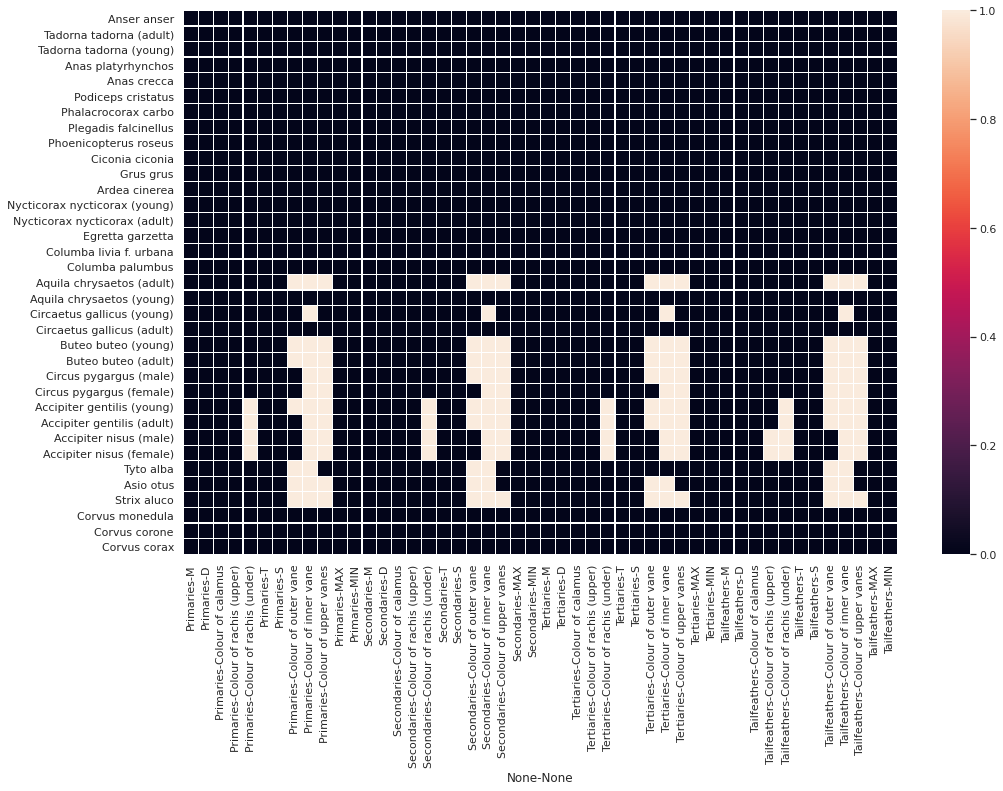

In [41]:
plt.figure(figsize=(16,10))
sns.heatmap(df_t.applymap(lambda x: 'stripes' in x if not pd.isna(x) else False), linewidths=0.1)

In [42]:
df_clr = df_t.loc[:,pd.IndexSlice[:,color_columns]].applymap(lambda x: sorted(str(x).split(' ')))

In [43]:
df_clr.applymap(lambda x: len(x)).describe()

Primaries                                                    \
      Colour of calamus Colour of rachis (upper) Colour of rachis (under)   
count         35.000000                35.000000                35.000000   
mean           1.114286                 1.457143                 1.628571   
std            0.322803                 0.505433                 0.770245   
min            1.000000                 1.000000                 1.000000   
25%            1.000000                 1.000000                 1.000000   
50%            1.000000                 1.000000                 1.000000   
75%            1.000000                 2.000000                 2.000000   
max            2.000000                 2.000000                 3.000000   

                                                                       \
      Colour of outer vane Colour of inner vane Colour of upper vanes   
count            35.000000            35.000000             35.000000   
mean              2.114286             2.685714              2.000000   
std               0.900047             1.207122              0.907485   
min               1.000000             1.000000              1.000000   
25%               2.000000             2.000000              1.000000   
50%               2.000000             3.000000              2.000000   
75%               2.500000             3.000000              3.000000   
max               5.000000             6.000000              4.000000   

            Secondaries                                                    \
      Colour of calamus Colour of rachis (upper) Colour of rachis (under)   
count         35.000000                35.000000                35.000000   
mean           1.142857                 1.600000                 1.628571   
std            0.355036                 0.603909                 0.770245   
min            1.000000                 1.000000                 1.000000   
25%            1.000000                 1.000000                 1.000000   
50%            1.000000                 2.000000                 1.000000   
75%            1.000000                 2.000000                 2.000000   
max            2.000000                 3.000000                 3.000000   

                                                                       \
      Colour of outer vane Colour of inner vane Colour of upper vanes   
count            35.000000            35.000000             35.000000   
mean              2.342857             2.657143              1.914286   
std               0.937546             1.186762              0.853072   
min               1.000000             1.000000              1.000000   
25%               2.000000             2.000000              1.000000   
50%               2.000000             3.000000              2.000000   
75%               3.000000             3.000000              2.500000   
max               5.000000             6.000000              4.000000   

             Tertiaries                                                    \
      Colour of calamus Colour of rachis (upper) Colour of rachis (under)   
count         35.000000                35.000000                35.000000   
mean           1.085714                 1.571429                 1.600000   
std            0.284029                 0.608069                 0.811679   
min            1.000000                 1.000000                 1.000000   
25%            1.000000                 1.000000                 1.000000   
50%            1.000000                 2.000000                 1.000000   
75%            1.000000                 2.000000                 2.000000   
max            2.000000                 3.000000                 3.000000   

                                                                       \
      Colour of outer vane Colour of inner vane Colour of upper vanes   
count            35.000000            35.000000             35.000000   
mean              2.

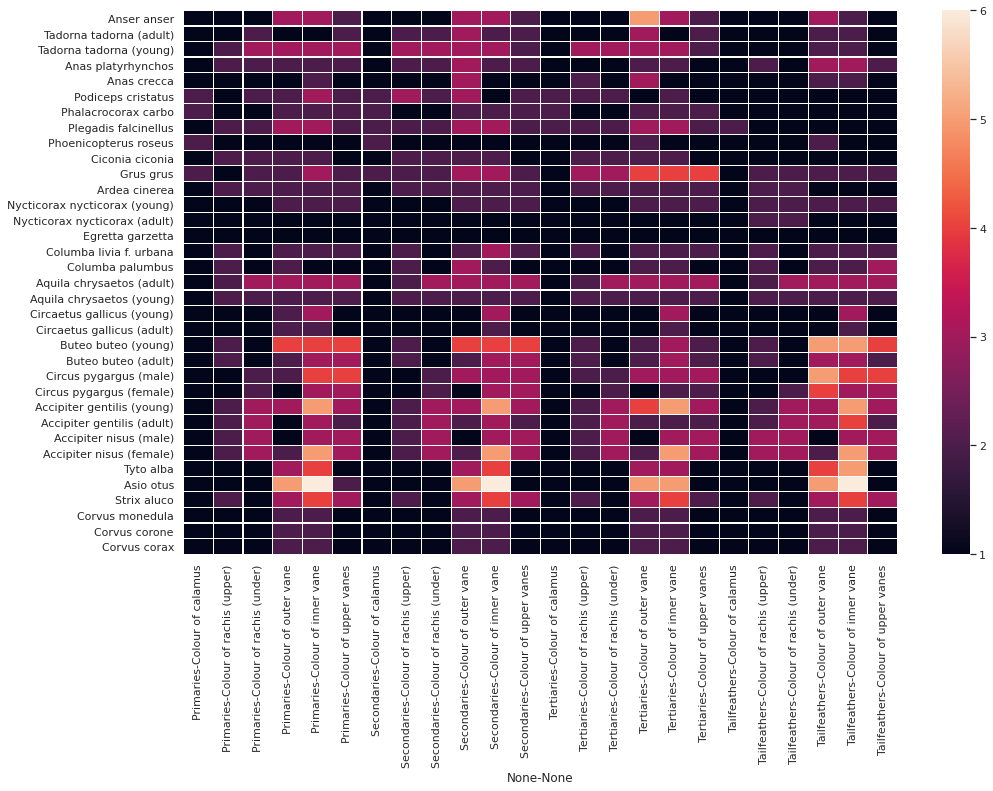

In [44]:
plt.figure(figsize=(16,10))
sns.heatmap(df_clr.applymap(lambda x: len(x)), linewidths=0.1)

In [45]:
df_clr.loc['Asio otus'].values

array([list(['white']), list(['brown']), list(['white']),
       list(['brown', 'lightbrown', 'orange', 'stripes', 'yellow']),
       list(['brown', 'lightbrown', 'orange', 'stripes', 'white', 'yellow']),
       list(['weak-stripes', 'white']), list(['white']), list(['brown']),
       list(['white']),
       list(['brown', 'lightbrown', 'orange', 'stripes', 'yellow']),
       list(['brown', 'lightbrown', 'orange', 'stripes', 'white', 'yellow']),
       list(['white']), list(['white']), list(['brown']), list(['white']),
       list(['brown', 'lightbrown', 'orange', 'stripes', 'yellow']),
       list(['brown', 'lightbrown', 'orange', 'stripes', 'yellow']),
       list(['white']), list(['white']), list(['brown']), list(['white']),
       list(['brown', 'lightbrown', 'orange', 'stripes', 'yellow']),
       list(['brown', 'lightbrown', 'orange', 'stripes', 'white', 'yellow']),
       list(['white'])], dtype=object)

In [46]:
values_t

,Colour of calamus,Colour of inner vane,Colour of outer vane,Colour of rachis (under),Colour of rachis (upper),Colour of upper vanes,D,M,MAX,MIN,S,T
0,"[brown, darkgrey, grey, lightgrey, nan, white,...","[black, brown, darkbrown, darkgrey, glossy, gr...","[black, brown, darkbrown, darkgrey, glossy, gr...","[black, brown, darkgrey, grey, lightgrey, nan,...","[black, brown, darkbrown, darkgrey, grey, ligh...","[black, brown, darkbrown, darkgrey, grey, ligh...","[1, 2, 3, nan]","[1, 2, 3, 4, 5, nan]","[100, 110, 115, 120, 130, 135, 140, 150, 160, ...","[100, 110, 115, 120, 130, 140, 150, 160, 165, ...","[1, 2, 3, nan]","[1, 2, 3, 4, 5, nan]"
